
- [Python mplfinance Plot yfinance Candle Chart, Moving Average, MACD and Volume (Multi Panel)](https://code.luasoftware.com/tutorials/algo-trading/python-mplfinance-plot-yfinance-candle-chart-moving-average-macd-and-volume/)

- [mplfinance — plotting financial data](https://towardsdatascience.com/mplfinance-matplolibs-relatively-unknown-library-for-plotting-financial-data-62c1c23177fd)
    
- [Stock Market Data Visualization Using Mplfinance](https://medium.com/mlearning-ai/stock-market-data-visualization-using-mplfinance-1d35a8d48e4#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImQ2M2RiZTczYWFkODhjODU0ZGUwZDhkNmMwMTRjMzZkYzI1YzQyOTIiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NDcxMzcyMTMsImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjEwMzgwMTUyNzUxMjY3NzAyMjMyNCIsImVtYWlsIjoid2VuLmcuZ29uZ0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IlcgR29uZyIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS0vQU9oMTRHaEZqLU90M2tnQVZLQWpOQkVrVVFYbVhacVdRRFVPTkU3TWlDTmpmUT1zOTYtYyIsImdpdmVuX25hbWUiOiJXIiwiZmFtaWx5X25hbWUiOiJHb25nIiwiaWF0IjoxNjQ3MTM3NTEzLCJleHAiOjE2NDcxNDExMTMsImp0aSI6IjU4OGY4MWJkNDk5ZjJiNzhkZGQ0ZDA0NjhjZTY0MmY2NmY3MjhlNWQifQ.Br1skeC1qHudywRwl4sJvjiC_kzBFPaITJVEjWpprBrV9ZSeCXYARiPb98VONFS77m3pGi3ZcDOgkva3GYU-TusoedJxx8Gz0noA6n0zHYOpBChg8He-66F9hsyAZ_nHWqNlnwRyHWA6ALq_LOVLoeu7GTeq56a5DD_sI0kbbrdJmhTcRzL1Kka33wwA533c7RhIxS8UbnabflIZiuA9MOcLWMcaRgjS93kExOCHeF4G-01_wjRjhFk-Ujz_p9t93fFUjuOT_WlosWrIkA8l3KEB-PKo4Mdlqr62cLiiBY_au1M0ICpEXLywbACT5i3ZnuW8DTJFcQ3BD6ubD7cDzA)

In [1]:
import pickle
import yfinance as yf

In [2]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

plt.style.use('ggplot')

In [21]:
import os.path

In [23]:
NUM_OF_DAYS_QUOTE = 400
FILE_CACHE_QUOTES = os.path.expanduser("~/df_quotes_cache.pickle")

In [8]:
def download_quote(symbol, num_days=NUM_OF_DAYS_QUOTE):
    return yf.Ticker(symbol).history(f"{num_days}d")

def get_quotes(symbol, num_days=NUM_OF_DAYS_QUOTE, cache=False):
    """
    check cache:
        import pickle
        data = pickle.load(open("df_quotes_cache.pickle", "rb"))
        data.keys()
    """
    if not cache:
        return download_quote(symbol, num_days=num_days)
        
    if os.path.exists(FILE_CACHE_QUOTES):
        quote_data = pickle.load(open(FILE_CACHE_QUOTES, "rb"))
        if symbol in quote_data and num_days == quote_data[symbol]["num_days"]:
            df = quote_data[symbol]["df"]
        else:
            df = download_quote(symbol, num_days=num_days)
            quote_data[symbol] = dict(num_days=num_days, df=df)
            pickle.dump(quote_data, open(FILE_CACHE_QUOTES, "wb"))
    else:
        df = download_quote(symbol, num_days=num_days)
        quote_data = {}
        quote_data[symbol] = dict(num_days=num_days, df=df)
        pickle.dump(quote_data, open(FILE_CACHE_QUOTES, "wb"))

    return df


In [9]:
data = get_quotes("QQQ", cache=True)

data.reset_index(inplace=True)    # change index=Date to regular column

In [12]:
ohlc = data.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]

In [13]:
ohlc['Date'] = pd.to_datetime(ohlc['Date'])

In [14]:
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)

In [15]:
ohlc.head()

,Date,Open,High,Low,Close
0,18485.0,267.335170,268.656416,262.884736,263.441040
1,18486.0,265.656327,271.040564,265.606639,270.067017
2,18487.0,270.861758,273.017430,269.719349,270.682953
3,18488.0,271.318742,271.596894,268.934576,270.365082
4,18491.0,272.123395,274.020802,270.404824,273.504242


In [16]:
ohlc = ohlc.astype(float)

In [17]:
# Creating Subplots
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)

In [18]:
candlestick_ohlc(axs[0,0], ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
# Setting labels & titles
axs[0,0].set_xlabel('Date')
axs[0,0].set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of QQQ')

Text(0.5, 0.98, 'Daily Candlestick Chart of QQQ')

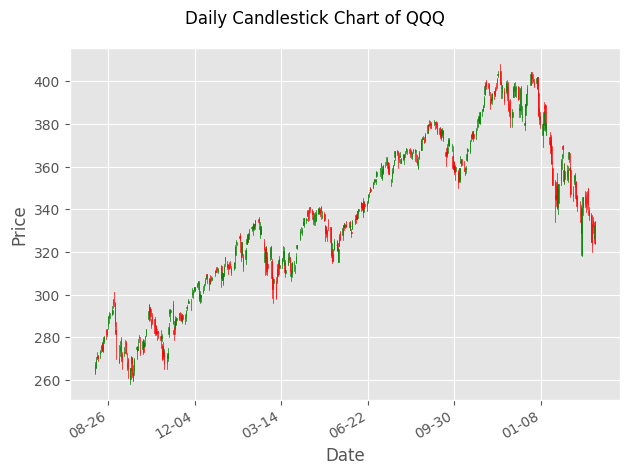

In [19]:
# Formatting Date
# date_format = mpl_dates.DateFormatter('%m-%d-%Y')
date_format = mpl_dates.DateFormatter('%m-%d')
axs[0,0].xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

In [26]:
import glob

In [28]:
glob.glob("*.png")

['ema-range-rsi-obv-qqq.png',
 'ICLN-0.3.png',
 'ema-range-rsi-obv-spy.png',
 'ema-range-rsi-obv-TSN.png',
 'SPY.png',
 'XLE.png',
 'GDX.png',
 'ema-range-rsi-obv-gdx.png',
 'QQQ.png',
 'ICLN-0.2.png']

In [33]:
[f for f in os.listdir(os.path.expanduser("~")) if f.endswith(".png")]

['UNG.png',
 'trading-times.png',
 'WEAT.png',
 'QQQ-1.png',
 'ung.png',
 'gdx.png',
 'GDX.png',
 'QQQ.png']